### multilayer perceptron, code in mlp.py, activation in hidden layer is tanh

In [1]:
#%load_ext autotime
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(color_codes=True)
plt.rcParams['savefig.dpi'] = 100

from IPython.display import display

import softmax_digits as softdg
from mlp import MLP

Soft limit starts as  : 9223372036854775807
Soft limit changed to : 2024000000


In [18]:
# read and preprocess data, see softmax_digits.py
(X_train, y_train, X_dev, y_dev, X_test, y_test, X_fulltest) = softdg.get_data(num_train=4000, 
        num_dev=500, num_test=500)

X_train shape (4000, 400)
X_dev shape (500, 400)
X_test shape (500, 400)


In [54]:
# Here we try different batch size strategies
import random
nepoch = 5
sz = len(y_train)
print 'Training data size is', sz
N = nepoch * len(y_train)
k = 8 # minibatch size

random.seed(10)
def epoch_sch():
    for i in xrange(nepoch):
        for j in xrange(sz):
            yield j

def rand_sch():
    for i in xrange(N):
        yield random.randint(0, sz)

def rand_minibatch(n, k):
    # minibatch with size k
    for _ in xrange (n / k):
        ret = [np.random.randint(0, sz) for _ in xrange(k)] 
        yield ret
def fullbatch():
    for i in range(5000):
        ret = range(sz)
        yield ret


Training data size is 4000


In [ ]:
mlp = MLP(dims=(400, 25, 10), alpha=0.0001, reg=0.01)
curve = mlp.train_sgd(X_train, y_train, fullbatch(), costevery=100, devX=X_dev, devy=y_dev)
counts, costs, costdevs  = zip(*curve)

Begin SGD...
  Seen 0 in 0.00 s
  [0]: mean train loss 2.56599 mean valid loss 2.56005
  [100]: mean train loss 0.241074

In [48]:
mlp = MLP(dims=(400, 25, 10), alpha=0.001, reg=0.01)
curve = mlp.train_sgd(X_train, y_train, rand_minibatch(1000090, 8), costevery=1000, devX=X_dev, devy=y_dev)
counts, costs, costdevs  = zip(*curve)

Begin SGD...
  Seen 0 in 0.00 s
  [0]: mean train loss 2.61802 mean valid loss 2.58941
  [1000]: mean train loss 0.502771 mean valid loss 0.568181
  [2000]: mean train loss 0.361396 mean valid loss 0.442708
  [3000]: mean train loss 0.302752 mean valid loss 0.401096
  [4000]: mean train loss 0.268125 mean valid loss 0.377302
  [5000]: mean train loss 0.246883 mean valid loss 0.36456
SGD Interrupted: saw 5017 examples in 5.72 seconds.


In [41]:
#mlp.grad_check(X_train[0], y_train[0])

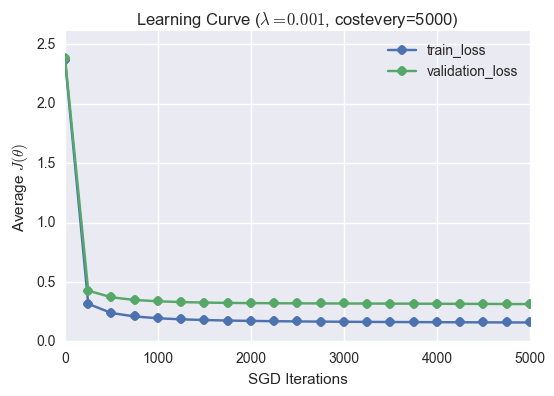

In [51]:
# plot train and dev errors
plt.figure(figsize=(6,4))

plt.plot(5*np.array(counts), costs, color='b', marker='o', linestyle='-', label=r"train_loss")
plt.plot(5*np.array(counts), costdevs, color='g', marker='o', linestyle='-', label=r"validation_loss")

plt.title(r"Learning Curve ($\lambda=0.001$, costevery=5000)")
plt.xlabel("SGD Iterations"); plt.ylabel(r"Average $J(\theta)$"); 
plt.ylim(ymin=0, ymax=max(1.1*max(costs),3*min(costs)));
plt.legend()
#plt.show()

In [52]:
accuracy_test = np.count_nonzero(mlp.predict(X_test) == y_test) / float(len(y_test))
print 'accuracy on test', accuracy_test
accuracy_test = np.count_nonzero(mlp.predict(X_train) == y_train) / float(len(y_train))
print 'accuracy on train', accuracy_test

accuracy on test 0.914
accuracy on train 0.9765


In [53]:
accuracy_test = np.count_nonzero(mlp.predict(X_dev) == y_dev) / float(len(y_dev))
print 'accuracy on train', accuracy_test

accuracy on train 0.912
